In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


/Users/Russell/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Exercise on Page 235 Nelson-Plosser

data=pd.read_csv('Ruppert Dataset/nelsonplosser.csv',index_col=0)

data.index=pd.to_datetime(data.index,format='%Y%m%d')

data=data.iloc[11:]





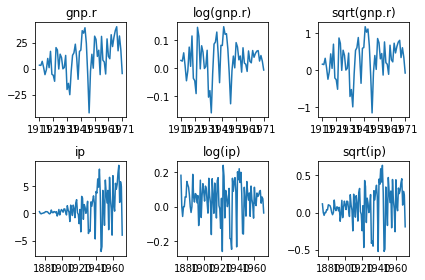

In [3]:
#Study the exogeneous data characters
#plot the data with difference level of transformation
fig,axes=plt.subplots(2,3)

((ax1,ax2,ax3),(ax4,ax5,ax6))=axes

ax1.plot(data.index.values,data['gnp.r'].diff())
ax1.set_title('gnp.r')



ax4.plot(data.index.values,data['ip'].diff())
ax4.set_title('ip')

ax2.plot(data.index.values,np.log(data['gnp.r']).diff())
ax2.set_title('log(gnp.r)')

ax5.plot(data.index.values,np.log(data['ip']).diff())
ax5.set_title('log(ip)')

ax3.plot(data.index.values,np.sqrt(data['gnp.r']).diff())
ax3.set_title('sqrt(gnp.r)')

ax6.plot(data.index.values,np.sqrt(data['ip']).diff())
ax6.set_title('sqrt(ip)')

plt.tight_layout()



In [4]:
#complete the data transformation in order to run regression
diff_data=pd.DataFrame()
diff_data['log_sp']=(np.log(data.sp)).diff()
diff_data['gnp_r']=data['gnp.r'].diff()
diff_data['gnp_pc']=data['gnp.pc'].diff()
diff_data['log_ip']=np.log(data['ip']).diff()
diff_data['log_cpi']=np.log(data['cpi']).diff()
diff_data['emp']=data['emp'].diff()
diff_data['bnd']=data['bnd'].diff()

In [5]:
diff_data.dropna(inplace=True)
diff_data.head()

,log_sp,gnp_r,gnp_pc,log_ip,log_cpi,emp,bnd
X.Y.m.d,,,,,,,
1910-12-31,-0.037780,3.3,9.0,0.058269,0.035091,690.0,0.03
1911-12-31,-0.011834,3.1,12.0,-0.038466,0.000000,417.0,0.10
1912-12-31,0.030903,7.0,54.0,0.137201,0.033902,1254.0,0.00
1913-12-31,-0.113203,1.2,-15.0,0.066140,-0.010050,865.0,0.10
1914-12-31,-0.051850,-5.8,-84.0,-0.066140,0.013378,-739.0,0.10


In [6]:
model=ols('log_sp~gnp_r+gnp_pc+log_ip+log_cpi+emp+bnd',diff_data)
model_fit=model.fit()

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_sp   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     5.167
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           0.000293
Time:                        22:10:18   Log-Likelihood:                 32.904
No. Observations:                  61   AIC:                            -51.81
Df Residuals:                      54   BIC:                            -37.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0277      0.031     -0.882      0.381      -0.091       0.035
gnp_r          0.0084      0.005      1.821      0.074      -0.001       0.018
gnp_pc        -0.0010      0.001     -1.028      0.309      -0.003       0.001
log_ip         0.6245      0.300      2.085      0.042       0.024       1.225
log_cpi        0.4935      0.402      1.229      0.225      -0.312       1.299
emp        -9.591e-06   3.35e-05     -0.287      0.776   -7.67e-05    5.75e-05
bnd           -0.2030      0.074     -2.745      0.008      -0.351      -0.055
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.253
Skew:                          -0.344   Prob(JB):                        0.534
Kurtosis:                       2.857   Cond. No.                     4.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Study the colinearity of different variables by calculating variance inflating factors

import statsmodels.stats.outliers_influence as outliers

outliers.variance_inflation_factor(diff_data.loc[:,'gnp_r':'bnd'],0)

TypeError: unhashable type: 'slice'

In [9]:

# 9.11 R Lab code
#Read raw data to 
raw=pd.read_csv('Ruppert Dataset/USMacroG.csv')
#Data Preprocessing
rawdata=raw-raw.shift()
rawdata.dropna(inplace=True)
data=rawdata[['consumption','dpi','cpi','government','unemp']]

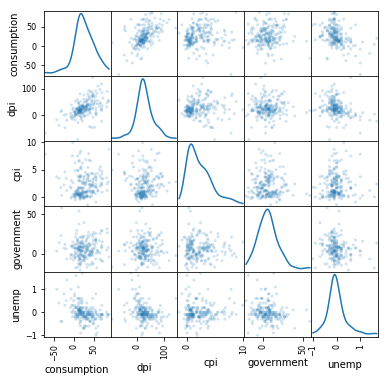

In [10]:
from pandas.plotting import scatter_matrix
%matplotlib inline  
scatter_matrix(data, alpha=0.2, figsize=(6, 6),diagonal='kde');
#original r function shows the name on diagonal; not sure if such functions available in Pandas

From the scatter plot, we can quickly see that dpi has a clear pattern with consumption. Unemp may have certain correlations with consumption. We can check by using certain selection criteria such as adjusted r-sqaure, AIC or BIC.

No exogeneous variables have clear pattern with another. there shall not be collinearity problems.

In [11]:
#Problem 2 on original exercise
#model=ols(y=data.consumption,x=data[['cons','dpi','cpi','government','unemp']]).fit()
model=ols('consumption~dpi+cpi+government+unemp',data=data)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.23
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           6.99e-17
Time:                        22:10:29   Log-Likelihood:                -893.52
No. Observations:                 202   AIC:                             1797.
Df Residuals:                     197   BIC:                             1814.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8945      2.547      5.847      0.000       9.871      19.918
dpi            0.3504      0.048      7.230      0.000       0.255       0.446
cpi            0.7167      0.681      1.053      0.294      -0.625       2.059
government    -0.0037      0.118     -0.031      0.975      -0.237       0.230
unemp        -16.5930      3.922     -4.231      0.000     -24.327      -8.859
==============================================================================
Omnibus:                        9.689   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.523
Skew:                           0.378   Prob(JB):                      0.00315
Kurtosis:                       3.893   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression analysis, dpi and unemp are impotant to change changes of consumption.

In [12]:
#Problem 3
table = sm.stats.anova_lm(result,typ=2)

In [13]:
table

,sum_sq,df,F,PR(>F)
dpi,21814.450795,1.0,52.271271,1.042792e-11
cpi,462.787488,1.0,1.108920,2.936066e-01
government,0.414016,1.0,0.000992,9.749052e-01
unemp,7470.597347,1.0,17.900869,3.563849e-05
Residual,82214.316158,197.0,NaN,NaN


Anova table provides the similar information as he summary of regression analysis. DPI and Unemp are significant

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(model.exog,4)

1.1390824282465015

In [72]:
#Design the function similar to stepAIC in R mass library
import itertools
def stepAIC(exo,endo):
    AIC={}
    for i in range(len(exo.columns.values),0,-1):
        #starting from all variables
        for variables in itertools.combinations(list(exo.columns.values),i):
            
            #select the variables to run regression
            predictors=exo[list(variables)]
            predictors['intercept']=1
            res=sm.OLS(endo,predictors).fit()
            #update AIC
            AIC[variables]=2*(i+1)-2*res.llf
    minimum=min(AIC.values())
    #find out the key for smallest AIC value
    for key,value in  AIC.items():
        if value==minimum:
            return (key,minimum)
    
    

In [73]:
min_aic=stepAIC(data[['dpi','cpi','government','unemp']],data['consumption'])


/Users/Russell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [74]:
min_aic

(('dpi', 'unemp'), 1794.1680829630209)

Problem 4:
The above code can only provide the result with minimized AIC, the sequent of variables removals cannot be obversed. The final result only includes dpi and unemp; government and cpi are removed.

Problem 5:
Based on the regression result, the orignla model with four variables has AIC of 1797. Aftr removing cp and government, AIC is 1794. It is not a very strong reduction.

Based on the R-code stepAIC function, the AIC was initially 1229. The reduced AIC is 1226. However, if we use r built in function AIC(), we can obtain that original AIC is 1807 and reduced AIC as 1804.

In [78]:
#calculate VIF for each factor
#designed wrapper to calculate the variance inflatio factor for each exogeneous factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(exo):
    vif={}
    for i in range(len(exo.columns.values)):
        vif[exo.columns.values[i]]=variance_inflation_factor(model.exog,i)
    return vif

In [79]:
vif_analysis=VIF(data[['dpi','cpi','government','unemp']])

In [80]:
vif_analysis

{'cpi': 1.1112818998745602,
 'dpi': 3.1405246305112842,
 'government': 1.0047385624987502,
 'unemp': 1.0257998728946631}

In [81]:
vif_analysis=VIF(data[['dpi','unemp']])

In [82]:
vif_analysis

{'dpi': 3.1405246305112842, 'unemp': 1.1112818998745602}

Problem 6: no variable has vif of more than 5. there is no evidence of strong collinearity. when we compare the two models, the vif for dpi and unemp are roughly the same.

In [ ]:
#Plot the partial residual plot

In [103]:
result.params.index.values[1]


'dpi'

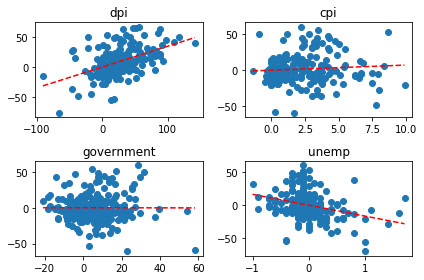

In [114]:
#Here, we will use the previous regression we built and saved under "model" and "result"
fig,axes=plt.subplots(2,2)
for i,ax in enumerate(axes.ravel()):
    x=model.exog[:,i+1]
    y=model.endog-result.predict()+result.params.iloc[i+1]*model.exog[:,i+1]
    xfit = np.array([np.amin(x), np.amax(x)])
    yfit=xfit*result.params.iloc[i+1]
    ax.plot(x,y,'o',xfit,yfit,'r--')
    ax.set_title(result.params.index.values[i+1])
plt.tight_layout()    

Problem 7: See the above plots.

In [ ]:


import pandas as pd
import numpy as np
x=pd.DataFrame(index=range(1,31))
x['x']=np.arange(1.0,15,14/30)
x['x2']=x.x**2


In [ ]:
np.corrcoef(x.x,x.x2)

In [ ]:
new_model=ols('x~x2',data=x).fit()
new_model.summary()

In [ ]:
new_model=ols('x2~x',data=x).fit()
new_model.summary()

In [ ]:
x['xbar']=x.x-x.x.mean()
x['x2bar']=x.xbar**2
np.corrcoef(x.xbar,x.x2bar)

In [ ]:
model=ols('x2bar~xbar',data=x).fit()
model.summary()